<font color = green >

## Hometask 

Mine top 10 association rules worth recommending for 
[Groceries dataset](https://www.kaggle.com/heeraldedhia/groceries-dataset)

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from apyori import apriori

In [14]:
data = pd.read_csv('Groceries_dataset.csv')
data.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [15]:
data.shape

(38765, 3)

(array([1.008e+04, 2.698e+03, 1.390e+03, 3.440e+02, 1.750e+02, 8.000e+01,
        1.450e+02, 5.000e+01, 0.000e+00, 1.000e+00]),
 array([ 2. ,  2.9,  3.8,  4.7,  5.6,  6.5,  7.4,  8.3,  9.2, 10.1, 11. ]),
 <BarContainer object of 10 artists>)

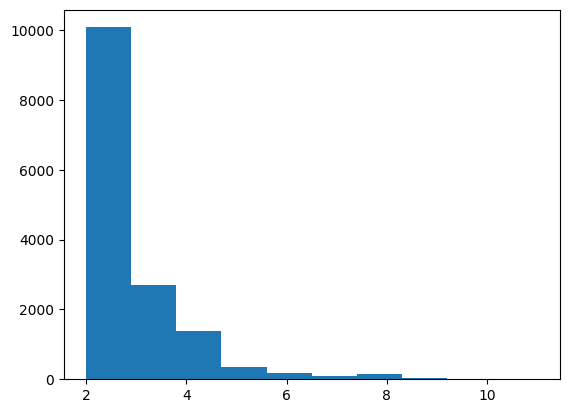

In [16]:
dist = [len(g) for k, g in data.groupby(['Member_number', 'Date'])]
plt.hist(dist)

### Checking for NAN

In [17]:
data['Member_number'].isnull().any()

False

In [18]:
data['Date'].isnull().any()

False

In [19]:
data['itemDescription'].isnull().any()

False

### Sorting data

In [20]:
data.sort_values(by='Member_number', ascending=True, inplace=True)

data.head(20)

,Member_number,Date,itemDescription
1629,1000,27-05-2015,soda
13331,1000,24-06-2014,whole milk
8395,1000,15-03-2015,whole milk
4843,1000,15-03-2015,sausage
17778,1000,27-05-2015,pickled vegetables
2047,1000,24-07-2015,canned beer
24544,1000,15-03-2015,yogurt
18196,1000,24-07-2015,misc. beverages
32851,1000,24-06-2014,salty snack
6388,1000,25-11-2015,sausage


### Let's group the elements

In [21]:
df = data.groupby(['Member_number', 'Date']).agg(
    lambda x: list(x)).reset_index()

columns_to_drop = ['Member_number', 'Date']
df.drop(columns=columns_to_drop, inplace=True)

df.head()

,itemDescription
0,"[whole milk, sausage, yogurt, semi-finished br..."
1,"[whole milk, salty snack, pastry]"
2,"[canned beer, misc. beverages]"
3,"[sausage, hygiene articles]"
4,"[soda, pickled vegetables]"


In [22]:
df = df['itemDescription']

In [23]:
trans = df.values.tolist()
trans[:20]

[['whole milk', 'sausage', 'yogurt', 'semi-finished bread'],
 ['whole milk', 'salty snack', 'pastry'],
 ['canned beer', 'misc. beverages'],
 ['sausage', 'hygiene articles'],
 ['soda', 'pickled vegetables'],
 ['curd', 'frankfurter'],
 ['whole milk', 'sausage', 'rolls/buns'],
 ['soda', 'whole milk'],
 ['beef', 'white bread'],
 ['frankfurter', 'whipped/sour cream', 'soda'],
 ['other vegetables', 'frozen vegetables'],
 ['butter', 'whole milk'],
 ['sugar', 'tropical fruit'],
 ['specialty chocolate', 'butter milk'],
 ['sausage', 'rolls/buns'],
 ['detergent', 'root vegetables'],
 ['dental care', 'frozen meals'],
 ['rolls/buns', 'rolls/buns'],
 ['dish cleaner', 'cling film/bags'],
 ['canned beer', 'frozen fish']]

### Learn rules 

In [24]:
rules = list(apriori(trans, min_support=0.0001,
             min_confidence=0.0002, min_lift=4, min_length=2))

rules[:20]

[RelationRecord(items=frozenset({'cake bar', 'Instant food products'}), support=0.00013366303548753594, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Instant food products'}), items_add=frozenset({'cake bar'}), confidence=0.03333333333333333, lift=5.421376811594203), OrderedStatistic(items_base=frozenset({'cake bar'}), items_add=frozenset({'Instant food products'}), confidence=0.02173913043478261, lift=5.421376811594204)]),
 RelationRecord(items=frozenset({'abrasive cleaner', 'frozen meals'}), support=0.00013366303548753594, ordered_statistics=[OrderedStatistic(items_base=frozenset({'abrasive cleaner'}), items_add=frozenset({'frozen meals'}), confidence=0.09090909090909093, lift=5.419413256066644), OrderedStatistic(items_base=frozenset({'frozen meals'}), items_add=frozenset({'abrasive cleaner'}), confidence=0.007968127490039842, lift=5.419413256066644)]),
 RelationRecord(items=frozenset({'abrasive cleaner', 'meat'}), support=0.00013366303548753594, ordered_statistics=[Ord

In [25]:
len(rules)

1611

In [26]:
rules = list(apriori(trans, min_support=0.0001,
             min_confidence=0.0002, min_lift=2, min_length=2))
rules[:20]

[RelationRecord(items=frozenset({'cake bar', 'Instant food products'}), support=0.00013366303548753594, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Instant food products'}), items_add=frozenset({'cake bar'}), confidence=0.03333333333333333, lift=5.421376811594203), OrderedStatistic(items_base=frozenset({'cake bar'}), items_add=frozenset({'Instant food products'}), confidence=0.02173913043478261, lift=5.421376811594204)]),
 RelationRecord(items=frozenset({'specialty bar', 'Instant food products'}), support=0.00013366303548753594, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Instant food products'}), items_add=frozenset({'specialty bar'}), confidence=0.03333333333333333, lift=2.3864433811802233), OrderedStatistic(items_base=frozenset({'specialty bar'}), items_add=frozenset({'Instant food products'}), confidence=0.009569377990430622, lift=2.3864433811802233)]),
 RelationRecord(items=frozenset({'specialty chocolate', 'Instant food products'}), support=0.00013

In [27]:
len(rules)

2958

### Print rules with more details 

In [28]:
def print_rules(rules):
    for rule in rules:
        print('rule.items=', list(rule.items))
        print('rule.support=', rule.support)

        for os in rule.ordered_statistics:
            print('\titems_base=', list(os.items_base))
            print('\tlifted_item =', list(os.items_add))
            print('\tlift=', os.lift)
            print('\tconfidence (i.e. cond prob {} if {})='.format(
                list(os.items_add), list(os.items_base)), os.confidence)
            print('\n')


print_rules(rules[:20])

rule.items= ['cake bar', 'Instant food products']
rule.support= 0.00013366303548753594
	items_base= ['Instant food products']
	lifted_item = ['cake bar']
	lift= 5.421376811594203
	confidence (i.e. cond prob ['cake bar'] if ['Instant food products'])= 0.03333333333333333


	items_base= ['cake bar']
	lifted_item = ['Instant food products']
	lift= 5.421376811594204
	confidence (i.e. cond prob ['Instant food products'] if ['cake bar'])= 0.02173913043478261


rule.items= ['specialty bar', 'Instant food products']
rule.support= 0.00013366303548753594
	items_base= ['Instant food products']
	lifted_item = ['specialty bar']
	lift= 2.3864433811802233
	confidence (i.e. cond prob ['specialty bar'] if ['Instant food products'])= 0.03333333333333333


	items_base= ['specialty bar']
	lifted_item = ['Instant food products']
	lift= 2.3864433811802233
	confidence (i.e. cond prob ['Instant food products'] if ['specialty bar'])= 0.009569377990430622


rule.items= ['specialty chocolate', 'Instant food prod

In [29]:
def print_rules_multi_os(rules):
    for rule in rules:
        if len(rule.ordered_statistics) > 1:
            print('rule.items=', list(rule.items))
            for os in rule.ordered_statistics:
                print('\n\titems_base=', list(os.items_base))
                print('\tlifted_item =', list(os.items_add))
                print('\tlift=', os.lift)
                print('\tconfidence (i.e. cond prob {} if {})='.format(
                    list(os.items_add), list(os.items_base)), os.confidence)

            break


print_rules_multi_os(rules[:20])

rule.items= ['cake bar', 'Instant food products']

	items_base= ['Instant food products']
	lifted_item = ['cake bar']
	lift= 5.421376811594203
	confidence (i.e. cond prob ['cake bar'] if ['Instant food products'])= 0.03333333333333333

	items_base= ['cake bar']
	lifted_item = ['Instant food products']
	lift= 5.421376811594204
	confidence (i.e. cond prob ['Instant food products'] if ['cake bar'])= 0.02173913043478261


### Access to terms values 

In [30]:
rules[0]

RelationRecord(items=frozenset({'cake bar', 'Instant food products'}), support=0.00013366303548753594, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Instant food products'}), items_add=frozenset({'cake bar'}), confidence=0.03333333333333333, lift=5.421376811594203), OrderedStatistic(items_base=frozenset({'cake bar'}), items_add=frozenset({'Instant food products'}), confidence=0.02173913043478261, lift=5.421376811594204)])

In [31]:
type(rules[0])

apyori.RelationRecord

In [32]:
list(rules[0].items)

['cake bar', 'Instant food products']

In [33]:
rules[0].support

0.00013366303548753594

In [34]:
rules[0].ordered_statistics

[OrderedStatistic(items_base=frozenset({'Instant food products'}), items_add=frozenset({'cake bar'}), confidence=0.03333333333333333, lift=5.421376811594203),
 OrderedStatistic(items_base=frozenset({'cake bar'}), items_add=frozenset({'Instant food products'}), confidence=0.02173913043478261, lift=5.421376811594204)]

#### Review possible values of amount of ordered statistics in rule

In [35]:
print('possible  amount of ordered_statistics:')
set([len(r.ordered_statistics) for r in rules])

possible  amount of ordered_statistics:


{2, 4, 6, 8, 10, 12, 14, 30}

In [36]:
list(rules[0].ordered_statistics[0].items_base)

['Instant food products']

In [37]:
list(rules[0].ordered_statistics[0].items_add)

['cake bar']

In [38]:
rules[0].ordered_statistics[0].lift

5.421376811594203

In [39]:
rules[0].ordered_statistics[0].confidence

0.03333333333333333